In [23]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.applications import InceptionV3
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

In [2]:
dataset_path = "C:\Projects\Age and Gender Prediction\dataset.csv"

In [3]:
df = pd.read_csv(dataset_path)
df.head()

,image,gender_index,age,gender,age_group,age_group_labels
0,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
1,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
2,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
3,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
4,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12


In [4]:
# Convert age group labels to one-hot encoded vectors
age_labels = pd.get_dummies(df['age_group_labels'], prefix='age')

# Add one-hot encoded age group labels to DataFrame as a new column
df['age_one_hot'] = age_labels.values.tolist()

In [5]:
df.head()

,image,gender_index,age,gender,age_group,age_group_labels,age_one_hot
0,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
2,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
4,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"


In [6]:
df['gender'] = df['gender'].astype(str)

In [7]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.15, random_state=42)

In [8]:
train_df.head()

,image,gender_index,age,gender,age_group,age_group_labels,age_one_hot
33425,C:\Projects\Age and Gender Prediction\UTKFace_...,1,27,Female,26-30,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
36502,C:\Projects\Age and Gender Prediction\UTKFace_...,1,28,Female,26-30,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
61831,C:\Projects\Age and Gender Prediction\UTKFace_...,0,40,Male,36-45,7,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
15022,C:\Projects\Age and Gender Prediction\UTKFace_...,0,23,Male,21-25,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
83436,C:\Projects\Age and Gender Prediction\UTKFace_...,0,62,Male,56-65,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"


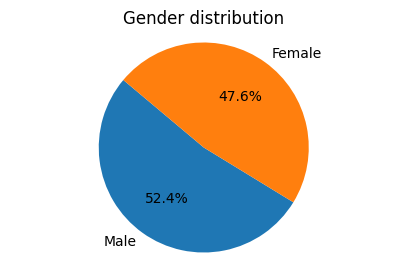

In [9]:
genders = train_df['gender'].value_counts()

plt.figure(figsize=(5,3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [10]:
test_df.head()

,image,gender_index,age,gender,age_group,age_group_labels,age_one_hot
48223,C:\Projects\Age and Gender Prediction\UTKFace_...,1,32,Female,31-35,6,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
15292,C:\Projects\Age and Gender Prediction\UTKFace_...,0,23,Male,21-25,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
15343,C:\Projects\Age and Gender Prediction\UTKFace_...,0,23,Male,21-25,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1801,C:\Projects\Age and Gender Prediction\UTKFace_...,1,13,Female,11-15,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
11189,C:\Projects\Age and Gender Prediction\UTKFace_...,1,20,Female,16-20,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [11]:
val_df.head()

,image,gender_index,age,gender,age_group,age_group_labels,age_one_hot
48223,C:\Projects\Age and Gender Prediction\UTKFace_...,1,32,Female,31-35,6,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
15292,C:\Projects\Age and Gender Prediction\UTKFace_...,0,23,Male,21-25,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
15343,C:\Projects\Age and Gender Prediction\UTKFace_...,0,23,Male,21-25,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1801,C:\Projects\Age and Gender Prediction\UTKFace_...,1,13,Female,11-15,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
11189,C:\Projects\Age and Gender Prediction\UTKFace_...,1,20,Female,16-20,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


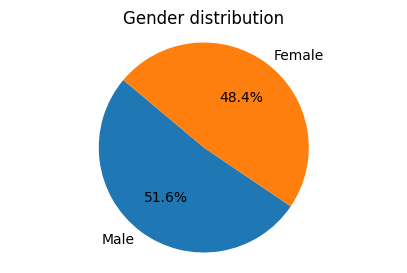

In [12]:
genders = val_df['gender'].value_counts()

plt.figure(figsize=(5, 3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [13]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [14]:
batch_size = 32
img_height = 224
img_width = 224

In [15]:
train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=True  # You can shuffle the training data
)

Found 80607 validated image filenames.


In [16]:
val_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=False  # No need to shuffle validation data
)

Found 14225 validated image filenames.


In [17]:
# Define the Sequential model
model = Sequential()

# Add convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Add fully connected layers for classification
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # output layer

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint

# Define a filepath to save the best model checkpoint
checkpoint_filepath = r'C:\Projects\Age and Gender Prediction\Gender Model\best_model.h5'  # You can change the filename and path as needed

# Define the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,  # Save only the best model
    monitor='val_loss',  # Monitor validation loss (you can change this to other metrics)
    mode='min',  # Minimize the monitored metric (for loss, use 'min'; for accuracy, use 'max')
    verbose=1  # Display messages when saving checkpoints
)

Epoch 1/15
2519/2519 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.7726
Epoch 1: val_loss improved from inf to 0.45596, saving model to C:\Projects\Age and Gender Prediction\Gender Model\best_model.h5
2519/2519 [==============================] - 2956s 1s/step - loss: 0.4634 - accuracy: 0.7726 - val_loss: 0.4560 - val_accuracy: 0.8101
Epoch 2/15


c:\Users\sweek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2519/2519 [==============================] - ETA: 0s - loss: 0.3484 - accuracy: 0.8422
Epoch 2: val_loss improved from 0.45596 to 0.40203, saving model to C:\Projects\Age and Gender Prediction\Gender Model\best_model.h5
2519/2519 [==============================] - 3095s 1s/step - loss: 0.3484 - accuracy: 0.8422 - val_loss: 0.4020 - val_accuracy: 0.8278
Epoch 3/15
2519/2519 [==============================] - ETA: 0s - loss: 0.3145 - accuracy: 0.8597
Epoch 3: val_loss did not improve from 0.40203
2519/2519 [==============================] - 2901s 1s/step - loss: 0.3145 - accuracy: 0.8597 - val_loss: 0.4701 - val_accuracy: 0.7541
Epoch 4/15
2519/2519 [==============================] - ETA: 0s - loss: 0.2936 - accuracy: 0.8711
Epoch 4: val_loss improved from 0.40203 to 0.33779, saving model to C:\Projects\Age and Gender Prediction\Gender Model\best_model.h5
2519/2519 [==============================] - 2780s 1s/step - loss: 0.2936 - accuracy: 0.8711 - val_loss: 0.3378 - val_accuracy: 0.8555

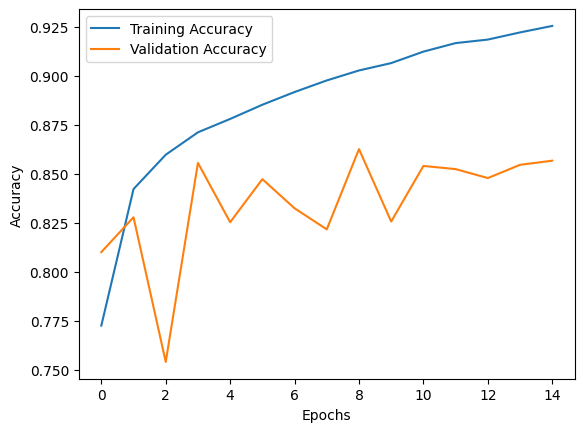

In [21]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,  # Adjust the number of epochs as needed
    batch_size = 32,
    callbacks=[model_checkpoint_callback]
)

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

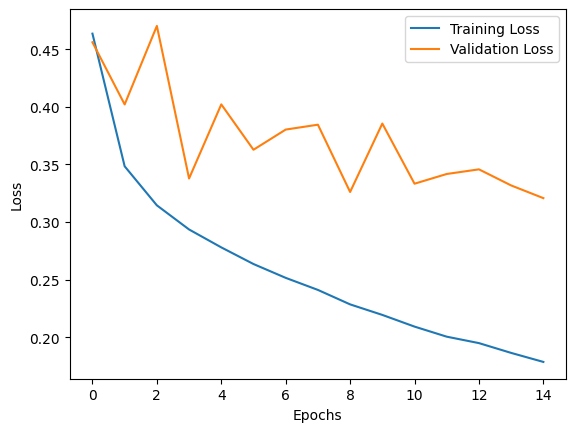

In [22]:
# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# assuming test_df is your DataFrame
random_row = test_df.sample(n=1)
random_image_path = random_row["image"].iloc[0]

print(f"Randomly selected image path: {random_image_path}")

Randomly selected image path: C:\Projects\Age and Gender Prediction\UTKFace_copy\24_1_1_20170115235619848.jpg


In [32]:
import lime
from lime import lime_image
from keras.models import load_model
from skimage.segmentation import mark_boundaries
from PIL import Image
import numpy as np

# Load your trained model
model = load_model(r'C:\Projects\Age and Gender Prediction\Gender Model\best_model.h5')

# Load the input image
input_image_path = random_image_path # Replace with the actual path
input_image = Image.open(input_image_path)
input_image = input_image.resize((224, 224))  # Resize to 224x224 pixels
input_image = np.array(input_image)  # Convert to numpy array

# Create a LIME explainer for image classification
explainer = lime_image.LimeImageExplainer()

# Explain the model's prediction for the input image
explanation = explainer.explain_instance(input_image, model.predict)

# Get the top explanation
top_explanation = explanation.local_exp[explanation.top_labels[0]]

# Print and visualize the explanation
print("Top Explanation:", top_explanation)
explanation_image = mark_boundaries(explanation.get_image_and_mask(explanation.top_labels[0])[0], explanation.segments)
Image.fromarray((explanation_image * 255).astype('uint8')).show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 119ms/step


  1%|          | 10/1000 [00:00<00:15, 63.54it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 20/1000 [00:00<00:14, 65.71it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 30/1000 [00:00<00:14, 67.77it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▍         | 40/1000 [00:00<00:14, 67.05it/s]

1/1 [==============================] - 0s 99ms/step


  5%|▌         | 50/1000 [00:00<00:14, 66.26it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 60/1000 [00:00<00:14, 65.87it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 70/1000 [00:01<00:14, 66.26it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 80/1000 [00:01<00:13, 66.46it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▉         | 90/1000 [00:01<00:13, 68.21it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 100/1000 [00:01<00:13, 66.40it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█         | 110/1000 [00:01<00:13, 68.26it/s]

1/1 [==============================] - 0s 81ms/step


 12%|█▏        | 120/1000 [00:01<00:12, 71.24it/s]

1/1 [==============================] - 0s 76ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 73.98it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▍        | 140/1000 [00:02<00:11, 77.05it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█▌        | 150/1000 [00:02<00:10, 77.28it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█▌        | 160/1000 [00:02<00:10, 78.62it/s]

1/1 [==============================] - 0s 79ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 80.06it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 81.50it/s]

1/1 [==============================] - 0s 78ms/step


 19%|█▉        | 190/1000 [00:02<00:09, 82.51it/s]

1/1 [==============================] - 0s 77ms/step


 20%|██        | 200/1000 [00:02<00:09, 83.46it/s]

1/1 [==============================] - 0s 80ms/step


 21%|██        | 210/1000 [00:02<00:09, 83.62it/s]

1/1 [==============================] - 0s 77ms/step


 22%|██▏       | 220/1000 [00:02<00:09, 83.59it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 230/1000 [00:03<00:09, 79.99it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██▍       | 240/1000 [00:03<00:09, 79.13it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▌       | 250/1000 [00:03<00:09, 81.37it/s]

1/1 [==============================] - 0s 81ms/step


 26%|██▌       | 260/1000 [00:03<00:09, 81.55it/s]

1/1 [==============================] - 0s 77ms/step


 27%|██▋       | 270/1000 [00:03<00:08, 82.52it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 280/1000 [00:03<00:08, 83.49it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 290/1000 [00:03<00:08, 81.49it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███       | 300/1000 [00:03<00:09, 77.26it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 310/1000 [00:04<00:09, 75.49it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 320/1000 [00:04<00:09, 72.91it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 70.09it/s]

1/1 [==============================] - 0s 97ms/step


 34%|███▍      | 340/1000 [00:04<00:09, 69.30it/s]

1/1 [==============================] - 0s 111ms/step


 35%|███▌      | 350/1000 [00:04<00:09, 67.03it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 360/1000 [00:04<00:09, 68.29it/s]

1/1 [==============================] - 0s 87ms/step


 37%|███▋      | 370/1000 [00:05<00:08, 70.74it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 380/1000 [00:05<00:08, 74.34it/s]

1/1 [==============================] - 0s 81ms/step


 39%|███▉      | 390/1000 [00:05<00:07, 76.26it/s]

1/1 [==============================] - 0s 74ms/step


 40%|████      | 400/1000 [00:05<00:07, 79.29it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████      | 410/1000 [00:05<00:07, 80.17it/s]

1/1 [==============================] - 0s 77ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 80.02it/s]

1/1 [==============================] - 0s 78ms/step


 43%|████▎     | 430/1000 [00:05<00:07, 80.94it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▍     | 440/1000 [00:05<00:06, 82.23it/s]

1/1 [==============================] - 0s 81ms/step


 45%|████▌     | 450/1000 [00:05<00:06, 82.75it/s]

1/1 [==============================] - 0s 78ms/step


 46%|████▌     | 460/1000 [00:06<00:06, 83.32it/s]

1/1 [==============================] - 0s 79ms/step


 47%|████▋     | 470/1000 [00:06<00:06, 80.97it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 480/1000 [00:06<00:06, 82.56it/s]

1/1 [==============================] - 0s 84ms/step


 49%|████▉     | 490/1000 [00:06<00:06, 82.15it/s]

1/1 [==============================] - 0s 76ms/step


 50%|█████     | 500/1000 [00:06<00:06, 83.23it/s]

1/1 [==============================] - 0s 76ms/step


 51%|█████     | 510/1000 [00:06<00:05, 83.13it/s]

1/1 [==============================] - 0s 76ms/step


 52%|█████▏    | 520/1000 [00:06<00:05, 83.98it/s]

1/1 [==============================] - 0s 75ms/step


 53%|█████▎    | 530/1000 [00:06<00:05, 83.67it/s]

1/1 [==============================] - 0s 79ms/step


 54%|█████▍    | 540/1000 [00:07<00:05, 83.82it/s]

1/1 [==============================] - 0s 77ms/step


 55%|█████▌    | 550/1000 [00:07<00:05, 84.36it/s]

1/1 [==============================] - 0s 81ms/step


 56%|█████▌    | 560/1000 [00:07<00:05, 83.25it/s]

1/1 [==============================] - 0s 76ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 84.00it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 580/1000 [00:07<00:05, 80.71it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 590/1000 [00:07<00:04, 82.87it/s]

1/1 [==============================] - 0s 76ms/step


 60%|██████    | 600/1000 [00:07<00:04, 83.13it/s]

1/1 [==============================] - 0s 79ms/step


 61%|██████    | 610/1000 [00:07<00:04, 83.89it/s]

1/1 [==============================] - 0s 79ms/step


 62%|██████▏   | 620/1000 [00:08<00:04, 84.22it/s]

1/1 [==============================] - 0s 76ms/step


 63%|██████▎   | 630/1000 [00:08<00:04, 83.80it/s]

1/1 [==============================] - 0s 81ms/step


 64%|██████▍   | 640/1000 [00:08<00:04, 83.29it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▌   | 650/1000 [00:08<00:04, 83.48it/s]

1/1 [==============================] - 0s 78ms/step


 66%|██████▌   | 660/1000 [00:08<00:04, 83.49it/s]

1/1 [==============================] - 0s 78ms/step


 67%|██████▋   | 670/1000 [00:08<00:03, 82.96it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 680/1000 [00:08<00:03, 80.16it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 690/1000 [00:08<00:03, 81.74it/s]

1/1 [==============================] - 0s 79ms/step


 70%|███████   | 700/1000 [00:08<00:03, 82.22it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 710/1000 [00:09<00:03, 83.55it/s]

1/1 [==============================] - 0s 78ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 83.76it/s]

1/1 [==============================] - 0s 73ms/step


 73%|███████▎  | 730/1000 [00:09<00:03, 84.80it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▍  | 740/1000 [00:09<00:03, 85.74it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▌  | 750/1000 [00:09<00:02, 85.86it/s]

1/1 [==============================] - 0s 77ms/step


 76%|███████▌  | 760/1000 [00:09<00:02, 85.60it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 770/1000 [00:09<00:02, 85.42it/s]

1/1 [==============================] - 0s 77ms/step


 78%|███████▊  | 780/1000 [00:09<00:02, 84.67it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▉  | 790/1000 [00:10<00:02, 85.63it/s]

1/1 [==============================] - 0s 91ms/step


 80%|████████  | 800/1000 [00:10<00:02, 81.55it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 810/1000 [00:10<00:02, 82.77it/s]

1/1 [==============================] - 0s 82ms/step


 82%|████████▏ | 820/1000 [00:10<00:02, 82.61it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 830/1000 [00:10<00:02, 82.31it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████▍ | 840/1000 [00:10<00:01, 81.00it/s]

1/1 [==============================] - 0s 80ms/step


 85%|████████▌ | 850/1000 [00:10<00:01, 81.18it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▌ | 860/1000 [00:10<00:01, 81.71it/s]

1/1 [==============================] - 0s 83ms/step


 87%|████████▋ | 870/1000 [00:11<00:01, 80.30it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 880/1000 [00:11<00:01, 80.69it/s]

1/1 [==============================] - 0s 84ms/step


 89%|████████▉ | 890/1000 [00:11<00:01, 80.09it/s]

1/1 [==============================] - 0s 82ms/step


 90%|█████████ | 900/1000 [00:11<00:01, 79.96it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 910/1000 [00:11<00:01, 78.92it/s]

1/1 [==============================] - 0s 75ms/step


 92%|█████████▏| 920/1000 [00:11<00:00, 81.66it/s]

1/1 [==============================] - 0s 77ms/step


 93%|█████████▎| 930/1000 [00:11<00:00, 82.62it/s]

1/1 [==============================] - 0s 84ms/step


 94%|█████████▍| 940/1000 [00:11<00:00, 82.52it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▌| 950/1000 [00:11<00:00, 83.66it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████▌| 960/1000 [00:12<00:00, 83.87it/s]

1/1 [==============================] - 0s 80ms/step


 97%|█████████▋| 970/1000 [00:12<00:00, 83.60it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 980/1000 [00:12<00:00, 84.53it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 990/1000 [00:12<00:00, 85.03it/s]

1/1 [==============================] - 0s 78ms/step


100%|██████████| 1000/1000 [00:12<00:00, 79.47it/s]


Top Explanation: [(19, 0.0356005625312169), (11, -0.030153456212384765), (20, -0.02879901586246169), (7, -0.028456706494434412), (25, -0.026219457095007035), (21, -0.02556374654689727), (23, -0.02416536171839922), (16, -0.019608233292412163), (14, 0.01871792922279055), (6, -0.017474072769132726), (3, -0.017015954793780656), (26, 0.014537120053478904), (12, -0.01281377926495443), (9, 0.01197901286684686), (17, 0.011558411742397759), (1, -0.011277626144370218), (22, 0.010832717336550498), (5, -0.01048070180472101), (28, -0.008975526538123247), (27, -0.007146672227531838), (8, 0.006896663279578724), (2, -0.006487826218298994), (24, 0.006129528888450844), (0, -0.005686647566102657), (29, -0.00467372772129422), (4, -0.004232134946053409), (18, 0.0023210436871516586), (15, -0.0010021563829706386), (10, -0.0009172659462188599), (13, -0.0008280377891521992)]
